In [29]:
import numpy as np

In [2]:
import pandas as pd

In [30]:
import matplotlib.pyplot as plt
from sklearn import linear_model

In [31]:
data=pd.read_csv('C:/Users/verma/Desktop/youtube/practice/air/Train.csv',usecols=['feature_1','feature_2','feature_3','feature_4','feature_5'])
X=data.values

In [32]:
data1=pd.read_csv('C:/Users/verma/Desktop/youtube/practice/air/Train.csv',usecols=['target'])
y=data1.values


In [33]:
u=X.mean(axis=0)
p=X.std(axis=0)
X=(X-u)/p

In [7]:
X.shape, y.shape

((1600, 5), (1600, 1))

In [8]:
ex=np.ones((X.shape[0],1))

In [9]:
X=np.hstack((ex,X))#to add the column of ones at front of X


In [21]:
X[0:2]

array([[ 1.        ,  0.29016495, -0.89871183, -0.37238147,  0.44177059,
         0.52502448],
       [ 1.        , -0.84270473, -0.15822922, -0.72365639, -0.99464217,
         0.59896038]])

In [16]:
def hypo(x,theta):
    y_=0.0
    n=x.shape[0]
    for i in range(n):
        y_+=(theta[i]*x[i])
    return y_

def error(X,y,theta):
    e=0.0
    n=X.shape[0]
    for i in range(n):
        y_=hypo(X[i],theta)
        e+=(y_-y[i])**2
    return e/n

def gradient(X,y,theta):
    m,n=X.shape
    grad=np.zeros((n,))
    for i in range(n):
        for j in range(m):
            yhp=hypo(X[j],theta)
            Y=y[j]
            grad[i]+=(yhp-Y)*X[j][i]
    return grad/m

def gradient_desc(X,y,lr=0.1,iters=500):
    m,n=X.shape
    theta=np.zeros((n,))
    errors=[]
    for i in range(iters):
        e=error(X,y,theta)
        errors.append(e)
        grad=gradient(X,y,theta)
        for j in range(n):
            theta[j]=theta[j]-lr*grad[j]
            
    return theta,errors        

In [17]:
theta,errors=gradient_desc(X,y)

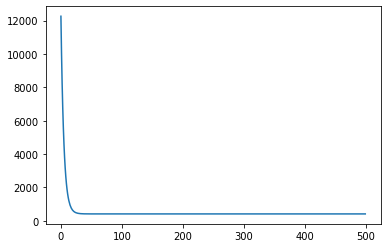

In [18]:
plt.plot(errors)

In [25]:
y_=[]
for i in range(X.shape[0]):
    pred=hypo(X[i],theta)
    y_.append(pred)
y_=np.array(y_)

def r2(y,y_):
    num=np.sum((y_-y)**2)
    den=np.sum((y-np.mean(y_))**2)
    sum=1-(num/den)
    print(sum*100)

In [28]:
r2(y,y_)

-314475.03471960954
